In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import colorsys

In [32]:
table_model = pd.read_csv("model.csv" , sep=';')
table_model.head()

,x,y,Unnamed: 2
0,0.0,1.00000,NaN
1,0.1,1.09928,NaN
2,0.2,1.19431,NaN
3,0.3,1.28546,NaN
4,0.4,1.37306,NaN


In [33]:
table_actual = pd.read_csv("actual.csv" , sep=';')
table_actual.head()

,x,y,Unnamed: 2
0,0.0,1.00000,NaN
1,0.1,1.13191,NaN
2,0.2,1.25262,NaN
3,0.3,1.36178,NaN
4,0.4,1.45990,NaN


In [34]:
table_best = pd.read_csv("best.csv" , sep=';')
table_best.head()

,x,y,Unnamed: 2
0,0.000000,1.00000,NaN
1,0.000049,1.00007,NaN
2,0.000098,1.00013,NaN
3,0.000146,1.00020,NaN
4,0.000195,1.00027,NaN


In [35]:
# def u(x, x0, c1, c2, c3, c4,  lambda_alpha, mu_alpha, lambda_beta, mu_beta ):
#     h = float(1/len(x))
#     u = []
#     for k in range(0, len(x)):
#         if (k*h < x0):
#             u.append(c1 * np.exp(lambda_alpha * k*h) + c2 * np.exp( - lambda_alpha * k*h) + mu_alpha)
#         if (k*h >= x0):
#             u.append(c3 * np.exp(lambda_beta * k*h) + c4 * np.exp( - lambda_beta * k*h) + mu_beta)
#     return u
# #     for i in x:
# #         if(i < x0):
# #             return c1 * np.exp(lambda_alpha * i) + c2 * np.exp( - lambda_alpha * i) + mu_alpha
# #         else: 
# #             return c3 * np.exp(lambda_beta * i) + c4 * np.exp( - lambda_beta * i) + mu_beta

In [36]:
def u(x, x0, c1, c2, c3, c4,  lambda_alpha, mu_alpha, lambda_beta, mu_beta ):
    u = []
    for k in x:
        if (k < x0):
            u.append(c1 * np.exp(lambda_alpha * k) + c2 * np.exp( - lambda_alpha * k) + mu_alpha)
        if (k >= x0):
            u.append(c3 * np.exp(lambda_beta * k) + c4 * np.exp( - lambda_beta * k) + mu_beta)
    return u
#     for i in x:
#         if(i < x0):
#             return c1 * np.exp(lambda_alpha * i) + c2 * np.exp( - lambda_alpha * i) + mu_alpha
#         else: 
#             return c3 * np.exp(lambda_beta * i) + c4 * np.exp( - lambda_beta * i) + mu_beta

In [37]:
x0 = 1/ np.sqrt(5)
u_0 = 1
u_1 = 2

k_a = np.sin(x0 ** 2) + 1
k_b = k_a
q_a = x0;
q_b = x0 ** 3
f_a = 1
f_b = x0 ** 2 - 1

lambda_a = np.sqrt(q_a / k_a)
lambda_b = np.sqrt(q_b / k_b)

mu_a = f_a / q_a
mu_b = f_b / q_b

A_11 = np.exp(-lambda_a * x0 ) - np.exp(lambda_a * x0)
A_12 = np.exp(lambda_b * (2 - x0)) - np.exp(lambda_b * x0)
A_21 = k_a * lambda_a * (np.exp(lambda_a * x0 ) + np.exp(-lambda_a * x0))
A_22 = k_b * lambda_b * (np.exp(lambda_b * (2 - x0)) + np.exp(lambda_b * x0))

B_1 = mu_b - mu_a + (mu_a - u_0 ) * np.exp(lambda_a * x0) - (mu_b - u_1)* np.exp(lambda_b* (1 - x0))
B_2 = k_a * lambda_a * (u_0 - mu_a) * np.exp(lambda_a * x0) + k_b * lambda_b *(u_1 - mu_b)* np.exp(lambda_b* (1 - x0))

c1 = (((u_0 - mu_a) * A_11 - B_1)* A_22 - ((u_0 - mu_a) * A_21 - B_2 )* A_12)/ (A_11 * A_22 - A_12 * A_21)
c2 = (B_1 * A_22 - B_2 * A_12) / (A_11 * A_22 - A_12 * A_21 )
c3 = (B_2 * A_11 - B_1 * A_21) / (A_11 * A_22 - A_12 * A_21 )
c4 = (u_1 - mu_b )* np.exp(lambda_b ) - c3 * np.exp( 2 * lambda_b)


No handles with labels found to put in legend.


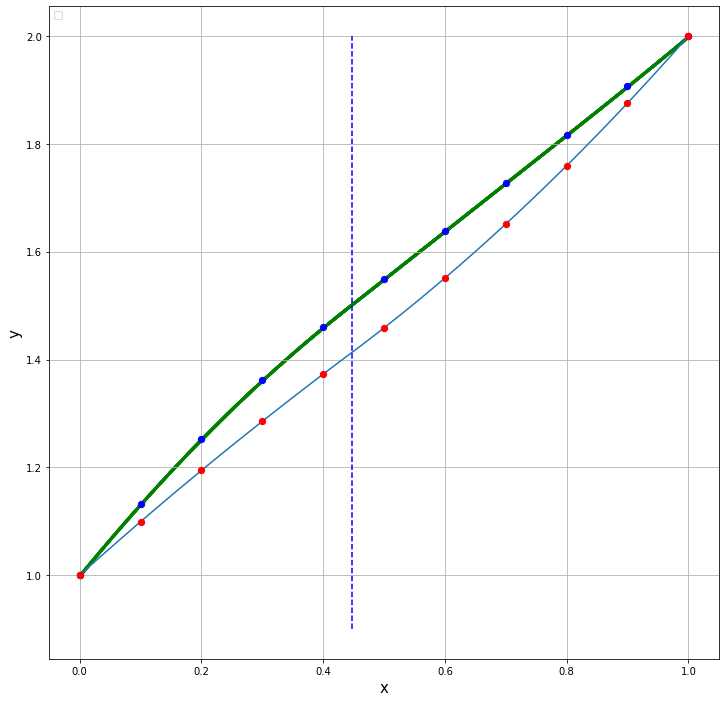

In [38]:
fig,ax=plt.subplots(figsize=(12,12))

#table_initial.plot(ax=ax,kind="line",x="x",y="y", legend = None, zorder = 1)
table_model.plot(ax=ax,kind="scatter",x="x",y="y", color = "red", s = 40, zorder = 3)
table_actual.plot(ax=ax,kind="scatter",x="x",y="y", color = "blue", s = 40, zorder = 2)
table_best.plot(ax=ax,kind="scatter",x="x",y="y", color = "green", s = 1, zorder = 1)


x = np.linspace(0,1,100)
y = u(x, x0, c1, c2, c3, c4,  lambda_a, mu_a, lambda_b, mu_b)
plt.plot(x,y,label = None, zorder = 2)
plt.plot([x0, x0], [0.9, 2], "b--")
plt.legend(loc = "upper left")
# plt.xlim((0.95, 2.05))
# plt.ylim((-1.05, -0.45))
plt.grid(zorder = 1)
plt.ylabel(r"y",size=15)
plt.xlabel(r"x",size=15)

fig.savefig("graph_grid.png")